In [1]:
# Basics
import numpy as np
import pandas as pd
import os

# Scipy
from scipy import optimize
from scipy.ndimage import gaussian_filter
#from sklearn.neighbors import KDTree
from scipy import stats

# Plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator, MaxNLocator
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
import matplotlib.colors as mcolors
from matplotlib import colors
import matplotlib.ticker as ticker
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

# RC params
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams["axes.edgecolor"] = 'black'
rcParams["legend.edgecolor"] = '0.8'
plt.rcParams.update({'errorbar.capsize': 2})
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

def fmt(x, pos):
    ''' Used for the x10^ for colourbars'''
    if x == 0:
        return r'0'
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

## Change which model you want to run here!

Update the ```model_to_analyse``` variable

In [32]:
model_path = "/Users/maddie/Desktop/Thesis/Simulation_output/2_phase_sims/magellan3/gcmp38d/"
os.chdir(model_path)

In [33]:
os.chdir(model_path + 'clump_2')
g_clump1 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_5')
g_clump2 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_0')
g_clump3 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_1')
g_clump4 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_3')
g_clump5 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_4')
g_clump6 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_6')
g_clump7 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_13')
g_clump8 = pd.read_pickle('./g_clump')
os.chdir("..")

In [43]:
model_path = "/Users/maddie/Desktop/Thesis/Simulation_output/2_phase_sims/magellan3/gcmp50/"
os.chdir(model_path)

In [44]:
# Run 50
os.chdir(model_path + 'clump_0')
g_clump1 = pd.read_pickle('./g_clump')
os.chdir(model_path + 'clump_1')
g_clump2 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_3')
g_clump3 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_6')
g_clump4 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_5')
g_clump5 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_2')
g_clump6 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_4')
g_clump7 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_10')
g_clump8 = pd.read_pickle('./g_clump')
os.chdir("..")

In [38]:
model_path = "/Users/maddie/Desktop/Thesis/Simulation_output/2_phase_sims/magellan3/gcmp55/"
os.chdir(model_path)

In [39]:
clump_numbers = [0,1,2,5,4,6, 7, 10]
# Run 55
os.chdir(model_path + 'clump_0')
g_clump1 = pd.read_pickle('./g_clump')
os.chdir(model_path + 'clump_1')
g_clump2 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_2')
g_clump3 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_5')
g_clump4 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_4')
g_clump5 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_6')
g_clump6 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_7')
g_clump7 = pd.read_pickle('./g_clump')
os.chdir('..')
os.chdir(model_path + 'clump_10')
g_clump8 = pd.read_pickle('./g_clump')
os.chdir("..")

In [45]:
clump_summary = pd.read_csv("clump_masses.csv")
#clump_summary = clump_summary.drop([31, 15]) # Comment this out!!!! - this is for run50
clump_summary = clump_summary.sort_values(by=['Gas_mass'], ascending=False)
clump_summary = clump_summary.assign(gas_new = clump_summary.Gas_mass+  clump_summary.New_mass)

print(clump_summary)

    clump_id    Gas_mass  Disc_mass    New_mass        R_gal    Fe_H_g  \
0          0  55244700.0  1723950.0  231945.300   180.277564 -1.382875   
1          1  47530800.0  2199825.0   56592.870   771.556868 -1.485707   
3          3   8761500.0   226125.0    2509.062  1509.867544 -1.494127   
6          6   6110100.0   128925.0       0.000  1129.291813 -1.501547   
5          5   5829300.0   139050.0    2061.078  1754.137965 -1.489495   
2          2   5756400.0   107325.0    4121.604  1531.828972 -1.479659   
4          4   5386500.0   104625.0    1945.740  1844.396920 -1.479591   
10        10   4384800.0    86400.0       0.000  1711.052308 -1.497147   
9          9   3234600.0    41850.0       0.000  1940.231945 -1.503381   
8          8   3183300.0    83700.0       0.000   752.728371 -1.498457   
7          7   2578500.0    31050.0    2060.838  2171.865558 -1.486778   
13        13    618300.0     4725.0       0.000   906.972987 -1.496388   
12        12    567000.0     7425.0   

In [14]:
def calc_KDE(g_clump, ymin, ymax):
    cmap = plt.cm.get_cmap('binary')

    xmin, xmax = min(g_clump.r_scale), max(g_clump.r_scale)
    #ymin, ymax = min(g_clump.Fe_H), max(g_clump.Fe_H)
    #ymin, ymax = -1.5, -0.75


    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])

    r_Fe_H = np.vstack([g_clump.r_scale, g_clump.Fe_H])
    kde = stats.gaussian_kde(r_Fe_H,  bw_method = 'silverman')
    #density = kde(r_Fe_H)
    f = np.reshape(kde(positions).T, xx.shape)
    return f.T

def calc_binCentres(g_clump, range_value):

    bin_means, bin_edges, binnumber = stats.binned_statistic(g_clump.r_scale, g_clump.Fe_H, statistic='median', bins=range_value/10, range = [0,range_value])
    bin_std, bin_edges, binnumber = stats.binned_statistic(g_clump.r_scale, g_clump.Fe_H, statistic='std', bins=range_value/10, range = [0,range_value])
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2
    
    return [bin_means, bin_std, bin_centers]

def min_max(g_clump):
    return min(g_clump.r_scale), max(g_clump.r_scale), min(g_clump.Fe_H), max(g_clump.Fe_H)

In [6]:
def fe_H_gradient(g_clump, range_value):
    cmap = plt.cm.get_cmap('binary')

    xmin, xmax = min(g_clump.r_scale), max(g_clump.r_scale)
    ymin, ymax = min(g_clump.Fe_H), max(g_clump.Fe_H)


    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])

    r_Fe_H = np.vstack([g_clump.r_scale, g_clump.Fe_H])
    kde = stats.gaussian_kde(r_Fe_H,  bw_method = 'silverman')
    #density = kde(r_Fe_H)
    f = np.reshape(kde(positions).T, xx.shape)


    bin_means, bin_edges, binnumber = stats.binned_statistic(g_clump.r_scale, g_clump.Fe_H, statistic='median', bins=range_value/10, range = [0,range_value])
    bin_std, bin_edges, binnumber = stats.binned_statistic(g_clump.r_scale, g_clump.Fe_H, statistic='std', bins=range_value/10, range = [0,range_value])
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2



    fig, ax = plt.subplots()
    gs = gridspec.GridSpec(2, 2, width_ratios=[1,0.2], height_ratios=[0.2, 1]) 

    ax0 = plt.subplot(gs[1,0])
    ax1 = plt.subplot(gs[1,1], sharey=ax0)
    ax2 = plt.subplot(gs[0,0], sharex=ax0)

    plt.setp(ax1.get_yticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)


    ax0.imshow(f.T, interpolation='bilinear', origin='lower',
                    cmap='binary', extent=[xmin, xmax, ymin, ymax], aspect='auto')
    ax0.plot(bin_centers, bin_means, '--', color='xkcd:cornflower')
    ax0.errorbar(bin_centers, bin_means, yerr=bin_std, zorder = 3, ls = '', color = 'xkcd:lavender blue')
    ax0.scatter(bin_centers, bin_means, zorder = 4, color='xkcd:baby blue')

    ax0.set_xlabel('r (pc)')
    ax0.set_ylabel('[Fe/H]')
    ax0.set_ylim(bottom = ymin)
    ax0.set_xlim(left = 0, right = range_value)
    ax0.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
    ax0.xaxis.set_minor_locator(AutoMinorLocator())
    ax0.yaxis.set_minor_locator(AutoMinorLocator())

    ax1.hist(g_clump.Fe_H[g_clump.r_scale < range_value], bins=30, orientation="horizontal", density = True, histtype = 'step', color = 'dimgrey')
    ax1.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)

    ax2.hist(g_clump.r_scale[g_clump.r_scale < range_value], bins=30, density = True, histtype = 'step', color = 'dimgrey', range=(0,150))
    ax2.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)

    gs.update(wspace=0.025, hspace=0.05)
    plt.savefig("Fe_H_KDE_"+str(range_value), bbox_inches='tight', dpi = 300)
    plt.close()

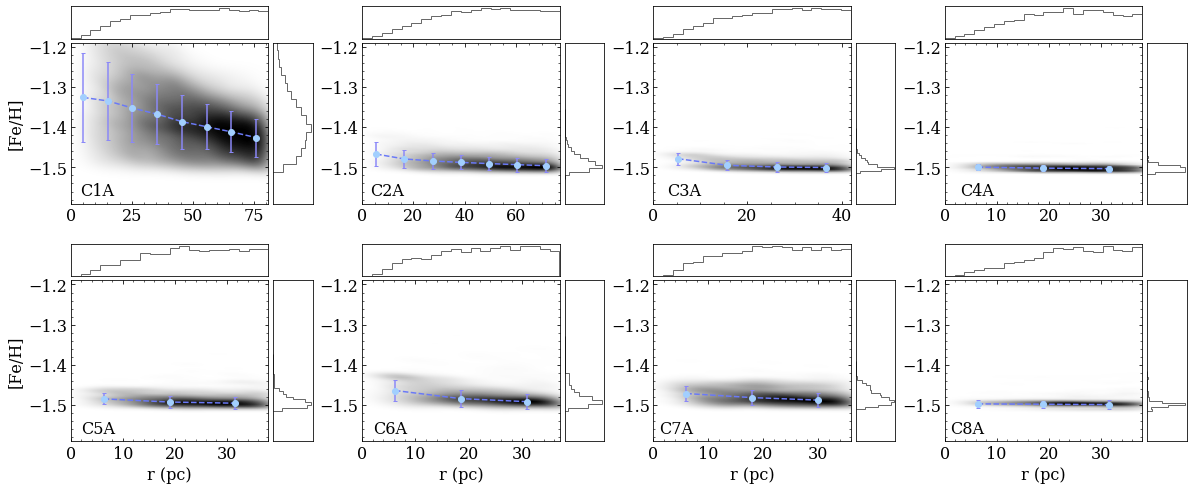

In [47]:
fig, ax = plt.subplots()
gs = gridspec.GridSpec(5, 11, width_ratios=[1,0.2, 0.2, 1, 0.2, 0.2, 1, 0.2, 0.2, 1, 0.2], height_ratios=[0.2, 1, 0.2, 0.2, 1]) 
fig.set_size_inches(20,8)

axC1 = plt.subplot(gs[1,0])
axC2 = plt.subplot(gs[1,3])
axC3 = plt.subplot(gs[1,6])
axC4 = plt.subplot(gs[1,9])

axC5 = plt.subplot(gs[4,0])
axC6 = plt.subplot(gs[4,3])
axC7 = plt.subplot(gs[4,6])
axC8 = plt.subplot(gs[4,9])

# r for radius
axrC1 = plt.subplot(gs[0,0], sharex=axC1)
axrC2 = plt.subplot(gs[0,3], sharex=axC2)
axrC3 = plt.subplot(gs[0,6], sharex=axC3)
axrC4 = plt.subplot(gs[0,9], sharex=axC4)

axrC5 = plt.subplot(gs[3,0], sharex=axC5)
axrC6 = plt.subplot(gs[3,3], sharex=axC6)
axrC7 = plt.subplot(gs[3,6], sharex=axC7)
axrC8 = plt.subplot(gs[3,9], sharex=axC8)

# m for metal
axmC1 = plt.subplot(gs[1,1], sharey=axC1)
axmC2 = plt.subplot(gs[1,4], sharey=axC2)
axmC3 = plt.subplot(gs[1,7], sharey=axC3)
axmC4 = plt.subplot(gs[1,10], sharey=axC4)

axmC5 = plt.subplot(gs[4,1], sharey=axC5)
axmC6 = plt.subplot(gs[4,4], sharey=axC6)
axmC7 = plt.subplot(gs[4,7], sharey=axC7)
axmC8 = plt.subplot(gs[4,10], sharey=axC8)


plt.setp(axmC1.get_yticklabels(), visible=False)
plt.setp(axrC1.get_xticklabels(), visible=False)

plt.setp(axmC2.get_yticklabels(), visible=False)
plt.setp(axrC2.get_xticklabels(), visible=False)

plt.setp(axmC3.get_yticklabels(), visible=False)
plt.setp(axrC3.get_xticklabels(), visible=False)

plt.setp(axmC4.get_yticklabels(), visible=False)
plt.setp(axrC4.get_xticklabels(), visible=False)

plt.setp(axmC5.get_yticklabels(), visible=False)
plt.setp(axrC5.get_xticklabels(), visible=False)

plt.setp(axmC6.get_yticklabels(), visible=False)
plt.setp(axrC6.get_xticklabels(), visible=False)

plt.setp(axmC7.get_yticklabels(), visible=False)
plt.setp(axrC7.get_xticklabels(), visible=False)

plt.setp(axmC8.get_yticklabels(), visible=False)
plt.setp(axrC8.get_xticklabels(), visible=False)


plt.setp(axrC1.get_yticklabels(), visible=False)
plt.setp(axmC1.get_xticklabels(), visible=False)

plt.setp(axrC2.get_yticklabels(), visible=False)
plt.setp(axmC2.get_xticklabels(), visible=False)

plt.setp(axrC3.get_yticklabels(), visible=False)
plt.setp(axmC3.get_xticklabels(), visible=False)

plt.setp(axrC4.get_yticklabels(), visible=False)
plt.setp(axmC4.get_xticklabels(), visible=False)

plt.setp(axrC5.get_yticklabels(), visible=False)
plt.setp(axmC5.get_xticklabels(), visible=False)

plt.setp(axrC6.get_yticklabels(), visible=False)
plt.setp(axmC6.get_xticklabels(), visible=False)

plt.setp(axrC7.get_yticklabels(), visible=False)
plt.setp(axmC7.get_xticklabels(), visible=False)

plt.setp(axrC8.get_yticklabels(), visible=False)
plt.setp(axmC8.get_xticklabels(), visible=False)


# r for radius
axrC1.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
axrC2.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
axrC3.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
axrC4.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)

axrC5.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
axrC6.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
axrC7.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
axrC8.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)

# m for metal
axmC1.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
axmC2.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
axmC3.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
axmC4.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)

axmC5.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
axmC6.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
axmC7.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
axmC8.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)

axC1.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
axC2.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
axC3.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
axC4.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)

axC5.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
axC6.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
axC7.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
axC8.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)

# gcmp38
#min_Feh = -1.5
#max_Feh = -0.75

# gcmp50
min_Feh = -1.59
max_Feh = -1.19

# gcmp55
#min_Feh = -1.59
#max_Feh = -1.4

xmin, xmax, ymin, ymax = min_max(g_clump1)
axC1.imshow(calc_KDE(g_clump1, min_Feh, max_Feh), interpolation='bilinear', origin='lower',
                   cmap='binary', extent=[xmin, xmax, min_Feh, max_Feh], aspect='auto')
#axC1.hexbin(g_clump1.r_scale,g_clump1.Fe_H, cmap='binary', gridsize = 20)
axC1.set_ylim(bottom = min_Feh, top = max_Feh)
axC1.set_xlim(left = 0, right = clump_summary.iloc[0]['crop_radii'])

xmin, xmax, ymin, ymax = min_max(g_clump2)
axC2.imshow(calc_KDE(g_clump2, min_Feh, max_Feh), interpolation='bilinear', origin='lower',
                    cmap='binary', extent=[xmin, xmax, min_Feh, max_Feh],  aspect='auto')
#axC2.hexbin(g_clump2.r_scale,g_clump2.Fe_H, cmap='binary', gridsize = 20)
axC2.set_ylim(bottom = min_Feh, top = max_Feh)
axC2.set_xlim(left = 0, right = clump_summary.iloc[1]['crop_radii'])

xmin, xmax, ymin, ymax = min_max(g_clump3)
axC3.imshow(calc_KDE(g_clump3, min_Feh, max_Feh), interpolation='bilinear', origin='lower',
                    cmap='binary', extent=[xmin, xmax, min_Feh, max_Feh],  aspect='auto')
#axC3.hexbin(g_clump3.r_scale,g_clump3.Fe_H, cmap='binary', gridsize = 20)
axC3.set_ylim(bottom = min_Feh, top = max_Feh)
axC3.set_xlim(left = 0, right = clump_summary.iloc[2]['crop_radii'])

xmin, xmax, ymin, ymax = min_max(g_clump4)
axC4.imshow(calc_KDE(g_clump4, min_Feh, max_Feh), interpolation='bilinear', origin='lower',
                    cmap='binary', extent=[xmin, xmax,min_Feh, max_Feh],  aspect='auto')
#axC4.hexbin(g_clump4.r_scale,g_clump4.Fe_H, cmap='binary', gridsize = 20)
axC4.set_ylim(bottom = min_Feh, top = max_Feh)
axC4.set_xlim(left = 0, right = clump_summary.iloc[3]['crop_radii'])

xmin, xmax, ymin, ymax = min_max(g_clump5)
axC5.imshow(calc_KDE(g_clump5, min_Feh, max_Feh), interpolation='bilinear', origin='lower',
                    cmap='binary', extent=[xmin, xmax, min_Feh, max_Feh],  aspect='auto')
#axC5.hexbin(g_clump5.r_scale,g_clump5.Fe_H, cmap='binary', gridsize = 20)
axC5.set_ylim(bottom = min_Feh, top = max_Feh)
axC5.set_xlim(left = 0, right = clump_summary.iloc[4]['crop_radii'])

xmin, xmax, ymin, ymax = min_max(g_clump6)
axC6.imshow(calc_KDE(g_clump6, min_Feh, max_Feh), interpolation='bilinear', origin='lower',
                    cmap='binary', extent=[xmin, xmax,min_Feh, max_Feh],  aspect='auto')
#axC6.hexbin(g_clump6.r_scale,g_clump6.Fe_H, cmap='binary', gridsize = 20)
axC6.set_ylim(bottom = min_Feh, top = max_Feh)
axC6.set_xlim(left = 0, right = clump_summary.iloc[5]['crop_radii'])

xmin, xmax, ymin, ymax = min_max(g_clump7)
axC7.imshow(calc_KDE(g_clump7, min_Feh, max_Feh), interpolation='bilinear', origin='lower',
                    cmap='binary', extent=[xmin, xmax, min_Feh, max_Feh], aspect='auto')
#axC7.hexbin(g_clump7.r_scale,g_clump7.Fe_H, cmap='binary', gridsize = 20)
axC7.set_ylim(bottom = min_Feh, top = max_Feh)
axC7.set_xlim(left = 0, right = clump_summary.iloc[6]['crop_radii'])

xmin, xmax, ymin, ymax = min_max(g_clump8)
axC8.imshow(calc_KDE(g_clump8, min_Feh, max_Feh), interpolation='bilinear', origin='lower',
                    cmap='binary', extent=[xmin, xmax, min_Feh, max_Feh],  aspect='auto')
#axC8.hexbin(g_clump8.r_scale,g_clump8.Fe_H, cmap='binary', gridsize = 20)
axC8.set_ylim(bottom = min_Feh, top = max_Feh)
axC8.set_xlim(left = 0, right = clump_summary.iloc[7]['crop_radii'])


# [bin_means, bin_std, bin_centers]
c1 = calc_binCentres(g_clump1, clump_summary.iloc[0]['crop_radii'])

axC1.plot(c1[2], c1[0], '--', color='xkcd:cornflower')
axC1.errorbar(c1[2], c1[0], yerr=c1[1], zorder = 3, ls = '', color = 'xkcd:lavender blue')
axC1.scatter(c1[2], c1[0], zorder = 4, color='xkcd:baby blue')

#axC1.set_xlabel('r (pc)')
axC1.set_ylabel('[Fe/H]')
axC1.xaxis.set_minor_locator(AutoMinorLocator())
axC1.yaxis.set_minor_locator(AutoMinorLocator())


c2 = calc_binCentres(g_clump2, clump_summary.iloc[1]['crop_radii'])

axC2.plot(c2[2], c2[0], '--', color='xkcd:cornflower')
axC2.errorbar(c2[2], c2[0], yerr=c2[1], zorder = 3, ls = '', color = 'xkcd:lavender blue')
axC2.scatter(c2[2], c2[0], zorder = 4, color='xkcd:baby blue')

#axC2.set_xlabel('r (pc)')
#axC2.set_ylabel('[Fe/H]')
axC2.xaxis.set_minor_locator(AutoMinorLocator())
axC2.yaxis.set_minor_locator(AutoMinorLocator())



c3 = calc_binCentres(g_clump3, clump_summary.iloc[2]['crop_radii'])

axC3.plot(c3[2], c3[0], '--', color='xkcd:cornflower')
axC3.errorbar(c3[2], c3[0], yerr=c3[1], zorder = 3, ls = '', color = 'xkcd:lavender blue')
axC3.scatter(c3[2], c3[0], zorder = 4, color='xkcd:baby blue')

#axC3.set_xlabel('r (pc)')
#axC3.set_ylabel('[Fe/H]')
axC3.xaxis.set_minor_locator(AutoMinorLocator())
axC3.yaxis.set_minor_locator(AutoMinorLocator())

c4 = calc_binCentres(g_clump4, clump_summary.iloc[3]['crop_radii'])

axC4.plot(c4[2], c4[0], '--', color='xkcd:cornflower')
axC4.errorbar(c4[2], c4[0], yerr=c4[1], zorder = 3, ls = '', color = 'xkcd:lavender blue')
axC4.scatter(c4[2], c4[0], zorder = 4, color='xkcd:baby blue')

#axC4.set_xlabel('r (pc)')
#axC4.set_ylabel('[Fe/H]')
axC4.xaxis.set_minor_locator(AutoMinorLocator())
axC4.yaxis.set_minor_locator(AutoMinorLocator())

c5 = calc_binCentres(g_clump5, clump_summary.iloc[4]['crop_radii'])

axC5.plot(c5[2], c5[0], '--', color='xkcd:cornflower')
axC5.errorbar(c5[2], c5[0], yerr=c5[1], zorder = 3, ls = '', color = 'xkcd:lavender blue')
axC5.scatter(c5[2], c5[0], zorder = 4, color='xkcd:baby blue')
axC5.set_xlabel('r (pc)')
axC5.set_ylabel('[Fe/H]')
axC5.xaxis.set_minor_locator(AutoMinorLocator())
axC5.yaxis.set_minor_locator(AutoMinorLocator())


c6 = calc_binCentres(g_clump6, clump_summary.iloc[5]['crop_radii'])

axC6.plot(c6[2], c6[0], '--', color='xkcd:cornflower')
axC6.errorbar(c6[2], c6[0], yerr=c6[1], zorder = 3, ls = '', color = 'xkcd:lavender blue')
axC6.scatter(c6[2], c6[0], zorder = 4, color='xkcd:baby blue')

axC6.set_xlabel('r (pc)')
#axC6.set_ylabel('[Fe/H]')
axC6.xaxis.set_minor_locator(AutoMinorLocator())
axC6.yaxis.set_minor_locator(AutoMinorLocator())

c7 = calc_binCentres(g_clump7, clump_summary.iloc[6]['crop_radii'])

axC7.plot(c7[2], c7[0], '--', color='xkcd:cornflower')
axC7.errorbar(c7[2], c7[0], yerr=c7[1], zorder = 3, ls = '', color = 'xkcd:lavender blue')
axC7.scatter(c7[2], c7[0], zorder = 4, color='xkcd:baby blue')

axC7.set_xlabel('r (pc)')
#axC7.set_ylabel('[Fe/H]')
axC7.xaxis.set_minor_locator(AutoMinorLocator())
axC7.yaxis.set_minor_locator(AutoMinorLocator())


c8 = calc_binCentres(g_clump8, clump_summary.iloc[7]['crop_radii'])

axC8.plot(c8[2], c8[0], '--', color='xkcd:cornflower')
axC8.errorbar(c8[2], c8[0], yerr=c8[1], zorder = 3, ls = '', color = 'xkcd:lavender blue')
axC8.scatter(c8[2], c8[0], zorder = 4, color='xkcd:baby blue')

axC8.set_xlabel('r (pc)')
#axC8.set_ylabel('[Fe/H]')
axC8.xaxis.set_minor_locator(AutoMinorLocator())
axC8.yaxis.set_minor_locator(AutoMinorLocator())

bn_no = 20

axmC1.hist(g_clump1.Fe_H[g_clump1.r_scale < clump_summary.iloc[0]['crop_radii']], bins=bn_no, orientation="horizontal", density = True, histtype = 'step', color = 'dimgrey')
axrC1.hist(g_clump1.r_scale[g_clump1.r_scale < clump_summary.iloc[0]['crop_radii']], bins=bn_no, density = True, histtype = 'step', color = 'dimgrey')

axmC2.hist(g_clump2.Fe_H[g_clump2.r_scale < clump_summary.iloc[1]['crop_radii']], bins=bn_no, orientation="horizontal", density = True, histtype = 'step', color = 'dimgrey')
axrC2.hist(g_clump2.r_scale[g_clump2.r_scale < clump_summary.iloc[1]['crop_radii']], bins=bn_no, density = True, histtype = 'step', color = 'dimgrey')

axmC3.hist(g_clump3.Fe_H[g_clump3.r_scale < clump_summary.iloc[2]['crop_radii']], bins=bn_no, orientation="horizontal", density = True, histtype = 'step', color = 'dimgrey')
axrC3.hist(g_clump3.r_scale[g_clump3.r_scale < clump_summary.iloc[2]['crop_radii']], bins=bn_no, density = True, histtype = 'step', color = 'dimgrey')

axmC4.hist(g_clump4.Fe_H[g_clump4.r_scale < clump_summary.iloc[3]['crop_radii']], bins=bn_no, orientation="horizontal", density = True, histtype = 'step', color = 'dimgrey')
axrC4.hist(g_clump4.r_scale[g_clump4.r_scale < clump_summary.iloc[3]['crop_radii']], bins=bn_no, density = True, histtype = 'step', color = 'dimgrey')

axmC5.hist(g_clump5.Fe_H[g_clump5.r_scale < clump_summary.iloc[4]['crop_radii']], bins=bn_no, orientation="horizontal", density = True, histtype = 'step', color = 'dimgrey')
axrC5.hist(g_clump5.r_scale[g_clump5.r_scale < clump_summary.iloc[4]['crop_radii']], bins=bn_no, density = True, histtype = 'step', color = 'dimgrey')

axmC6.hist(g_clump6.Fe_H[g_clump6.r_scale < clump_summary.iloc[5]['crop_radii']], bins=bn_no, orientation="horizontal", density = True, histtype = 'step', color = 'dimgrey')
axrC6.hist(g_clump6.r_scale[g_clump6.r_scale < clump_summary.iloc[5]['crop_radii']], bins=bn_no, density = True, histtype = 'step', color = 'dimgrey')

axmC7.hist(g_clump7.Fe_H[g_clump7.r_scale < clump_summary.iloc[6]['crop_radii']], bins=bn_no, orientation="horizontal", density = True, histtype = 'step', color = 'dimgrey')
axrC7.hist(g_clump7.r_scale[g_clump7.r_scale < clump_summary.iloc[6]['crop_radii']], bins=bn_no, density = True, histtype = 'step', color = 'dimgrey')

axmC8.hist(g_clump8.Fe_H[g_clump8.r_scale < clump_summary.iloc[7]['crop_radii']], bins=bn_no, orientation="horizontal", density = True, histtype = 'step', color = 'dimgrey')
axrC8.hist(g_clump8.r_scale[g_clump8.r_scale < clump_summary.iloc[7]['crop_radii']], bins=bn_no, density = True, histtype = 'step', color = 'dimgrey')



axC1.text(4, min_Feh + 0.02, 'C1A')
axC2.text(3, min_Feh + 0.02, 'C2A')
axC3.text(3, min_Feh + 0.02, 'C3A')
axC4.text(3, min_Feh + 0.02, 'C4A')

axC5.text(2, min_Feh + 0.02, 'C5A')
axC6.text(2, min_Feh + 0.02, 'C6A')
axC7.text(1, min_Feh + 0.02, 'C7A')
axC8.text(1, min_Feh + 0.02, 'C8A')



gs.update(wspace=0.05, hspace=0.05)
plt.savefig("All_clumps_test_2A", bbox_inches='tight', dpi = 300)
plt.show()